In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def _getInitValues(num,mini=-100,maxi=100):
    centroids = []
    if mini > maxi:
        raise ValueError('maxi should be greater than mini')
    else:
        for i in range(num):
            meanBtw = (maxi - mini)/ 2 + mini
            distance = maxi - meanBtw
            result = (np.random.rand(2) - 0.5) * distance * 2 + meanBtw
            centroids.append(result)
        return centroids

def getBestCentroidAll(data,centroids):
    pair = []
    for i in range(len(data)):
        cId = _getBestCentroid(one_data=data[i],centroids=centroids)
        result = [data[i], cId]
        pair.append(result)
    return pair

def _getBestCentroid(one_data,centroids):
    tmp = []
    for j in range(len(centroids)):
        dis = _distance(one_data,centroids[j])
        tmp.append(dis)
    result = min(tmp)
    index = tmp.index(result)
    return index

def  _distance(arr,ini):
    return np.linalg.norm(np.abs(ini - arr))

def _clusterise(data_with_cl,numCl):
    clusters = [[]] * numCl
    for i in range(numCl):
        tmp = []
        for data, cl in data_with_cl:
            if cl == i:
                tmp.append(data)
            else:
                pass
        clusters[i] = tmp
    return clusters


def meanCluster(data_with_cl,numCl):
    meanClusters = [[]]*numCl
    dim = 2
    clusters = _clusterise(data_with_cl,numCl)
    for i in range(numCl):
        mean = [[]] * dim
        arr = np.array([v for v in clusters[i]])
        for l in range(dim):
            mean[l] = np.mean(arr[:,l])
        meanClusters[i] = mean
    return meanClusters

def plot(centroids,label=''):
    arr = arr = np.array([i for i in centroids])
    x = arr[:,0]
    y = arr[:,1]
    plt.plot(x,y,'o',label=label)
    print(centroids)
    plt.legend()

#収束判定をするために、評価関数を作る
def J(data_with_cl,centroids):
    clusters = _clusterise(data_with_cl=data_with_cl,numCl=2)
    tmp = []
    for i,cluster in enumerate(clusters):
        arr = np.array([val - centroids[i]  for val in cluster])
        tmp.append(np.sum(arr **2))
    value = np.sum(tmp)
    return value


In [38]:

#initial centroids
centroids = _getInitValues(3,mini=10,maxi=30)
#sample data
data = np.loadtxt("sample_2d_data.txt")


# with initial centroids, check all data and return a nearby centroid
pairs2 = getBestCentroidAll(data,centroids=centroids)
centroids2 = meanCluster(pairs2,numCl=3)

pairs3 = getBestCentroidAll(data,centroids=centroids2)
centroids3 = meanCluster(pairs3,numCl=3)

pairs4 = getBestCentroidAll(data,centroids=centroids3)
centroids4 = meanCluster(pairs4,numCl=3)


In [45]:
pairs5 = getBestCentroidAll(data,centroids=centroids4)
centroids5 = meanCluster(pairs5,numCl=3)


In [52]:
pairs6 = getBestCentroidAll(data,centroids=centroids5)
centroids6 = meanCluster(pairs6,numCl=3)

pairs7 = getBestCentroidAll(data,centroids=centroids6)
centroids7 = meanCluster(pairs7,numCl=3)


In [39]:
data.shape

(150, 2)

No handles with labels found to put in legend.


[[18.80728462  8.84043083]
 [21.4061834   9.38619792]
 [17.96814078 10.57028892]
 [18.01298175  7.74211803]
 [18.89361139  9.50399299]
 [19.29507339 11.29355314]
 [20.48085325 11.28969692]
 [21.24332881 11.18039688]
 [19.2415281   8.58122515]
 [19.44972536 11.52851763]
 [20.87596972  8.98088883]
 [20.36339594 10.04919095]
 [19.81661346 10.07616238]
 [20.79694606 10.89612485]
 [18.74895515 10.61873962]
 [20.18170312 10.2878868 ]
 [19.89799322 12.61811873]
 [21.12315135  9.54625419]
 [19.17221298  9.24240839]
 [20.15530947  8.98709358]
 [20.59825847 13.39749252]
 [20.55852875 10.09183501]
 [21.15976112 10.10152249]
 [20.37494385  8.43116346]
 [20.9794233   9.75104869]
 [19.02320513  8.64455355]
 [19.55791466  9.40132442]
 [20.38525784  9.96499396]
 [19.9843705  13.18638941]
 [20.01247808  9.40162223]
 [19.68387475 10.12511332]
 [19.74791675  9.38767187]
 [18.99286103 11.19490705]
 [20.84878042  8.76948818]
 [19.52776447  9.87053938]
 [19.92968509 11.15535051]
 [18.77685152  9.07900086]
 

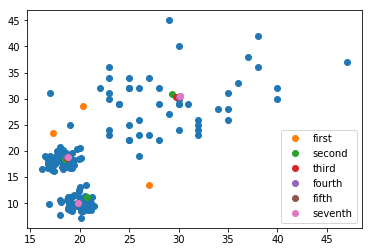

In [53]:
plot(data)
plot(centroids,"first")
plot(centroids2,"second")
plot(centroids3,"third")
plot(centroids4,"fourth")
plot(centroids5,"fifth")
plot(centroids7,"seventh")

In [54]:
print(J(pairs,centroids))
print(J(pairs2,centroids2))
print(J(pairs3,centroids3))
print(J(pairs4,centroids4))
print(J(pairs5,centroids5))
print(J(pairs7,centroids7))
# Jによって更新を停めるべきか

38165.50345503395
2784.3390212932445
3044.5098797281316
3032.600191401836
3029.6057980146034
3029.6057980146034


No handles with labels found to put in legend.


[[18.80728462  8.84043083]
 [21.4061834   9.38619792]
 [17.96814078 10.57028892]
 [18.01298175  7.74211803]
 [18.89361139  9.50399299]
 [19.29507339 11.29355314]
 [20.48085325 11.28969692]
 [21.24332881 11.18039688]
 [19.2415281   8.58122515]
 [19.44972536 11.52851763]
 [20.87596972  8.98088883]
 [20.36339594 10.04919095]
 [19.81661346 10.07616238]
 [20.79694606 10.89612485]
 [18.74895515 10.61873962]
 [20.18170312 10.2878868 ]
 [19.89799322 12.61811873]
 [21.12315135  9.54625419]
 [19.17221298  9.24240839]
 [20.15530947  8.98709358]
 [20.59825847 13.39749252]
 [20.55852875 10.09183501]
 [21.15976112 10.10152249]
 [20.37494385  8.43116346]
 [20.9794233   9.75104869]
 [19.02320513  8.64455355]
 [19.55791466  9.40132442]
 [20.38525784  9.96499396]
 [19.9843705  13.18638941]
 [20.01247808  9.40162223]
 [19.68387475 10.12511332]
 [19.74791675  9.38767187]
 [18.99286103 11.19490705]
 [20.84878042  8.76948818]
 [19.52776447  9.87053938]
 [19.92968509 11.15535051]
 [18.77685152  9.07900086]
 

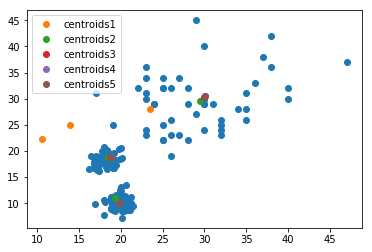

In [62]:
diff = 100
centroids = _getInitValues(3,mini=10,maxi=30)
pairs = getBestCentroidAll(data,centroids)
plot(data)
preJ = J(pairs,centroids)
plot(centroids,"centroids1")
count = 1
while diff > .0001:
    count += 1
    pairs = getBestCentroidAll(data,centroids)
    centroids = meanCluster(pairs,3)
    plot(centroids,"centroids{}".format(count))
    newJ = J(pairs,centroids)
    diff = preJ - newJ
    preJ = newJ
print(preJ)
print(newJ)